In [ ]:
!pip install tensorflowjs

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Capstone/Dataset'
os.listdir(path)

['train', 'val']

In [ ]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')

In [ ]:
img_width, img_height = 150, 150
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
    )

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
    )

Found 1215 images belonging to 4 classes.
Found 340 images belonging to 4 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 919,460 (3.51 MB)

 Trainable params: 919,460 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size
          )

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4608 - loss: 1.1685 - val_accuracy: 0.7188 - val_loss: 0.7934
Epoch 2/30
 1/37 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7812 - loss: 0.6262

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7812 - loss: 0.6262 - val_accuracy: 0.6500 - val_loss: 0.7693
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.7642 - loss: 0.6269 - val_accuracy: 0.8125 - val_loss: 0.4985
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8125 - loss: 0.4925 - val_accuracy: 0.8000 - val_loss: 0.4896
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.8087 - loss: 0.4696 - val_accuracy: 0.8438 - val_loss: 0.4435
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.3884 - val_accuracy: 0.7000 - val_loss: 0.7001
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7803 - loss: 0.4837 - val_accuracy: 0.8219 - val_loss: 0.4666
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8438 - loss: 0.4568 - val_accuracy: 0.9500 - val_loss: 0.2039
Epoch 9/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8339 - loss: 0.3917 - val_accuracy: 0.8344 - val_loss: 0.4777
Epo

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(val_acc))

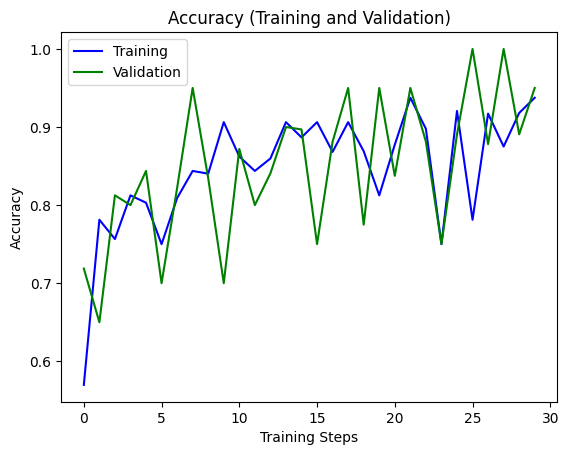

In [ ]:
plt.figure()
plt.title('Accuracy (Training and Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')

plt.plot(acc, 'b', label='Training')
plt.plot(val_acc, 'g', label='Validation')
plt.legend()

plt.show()

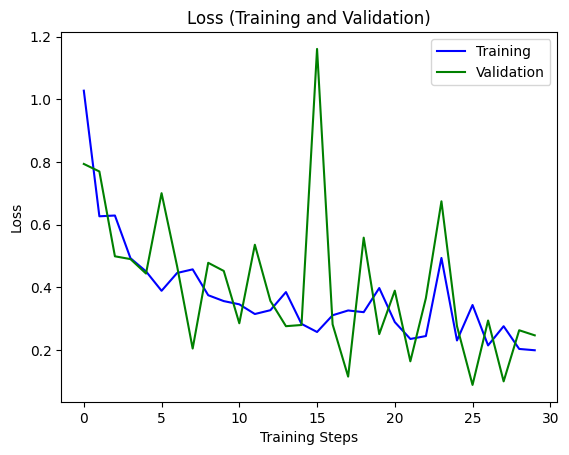

In [ ]:
plt.figure()
plt.title('Loss (Training and Validation)')
plt.ylabel('Loss')
plt.xlabel('Training Steps')

plt.plot(loss, 'b', label='Training')
plt.plot(val_loss, 'g', label='Validation')
plt.legend()

plt.show()

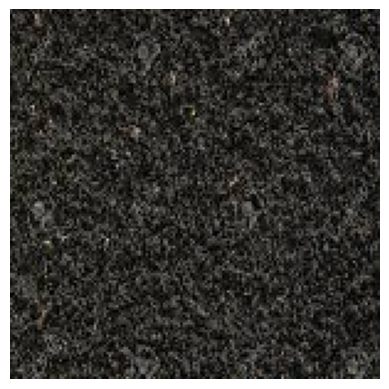

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
True label: Black Soil
Predicted label: Black Soil


In [ ]:
def get_class_string_from_index(index):
    for class_string, class_index in validation_generator.class_indices.items():
        if class_index == index:
            return class_string
    return None

x_batch, y_batch = next(validation_generator)
image = x_batch[0]
true_index = np.argmax(y_batch[0])

plt.imshow(image)
plt.axis('off')
plt.show()

expanded_image = np.expand_dims(image, axis=0)
prediction_scores = model.predict(expanded_image)
predicted_index = np.argmax(prediction_scores)

true_label = get_class_string_from_index(true_index)
predicted_label = get_class_string_from_index(predicted_index)

print(f'True label: {true_label}')
print(f'Predicted label: {predicted_label}')


In [ ]:
saved_model_path = '/content/drive/MyDrive/Capstone/Model/Soil_Classification.h5'
model.save(saved_model_path)

In [ ]:
!pip install tensorrt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-10.0.1-py2.py3-none-any.whl size=16331 sha256=82433a28c4be23f7b96ba2197c1d4a804701b4bb97d58df92a016a0361611a7d
  Stored in directory: /root/.cache/pip/wheels/43/0e/35/f5de9a100ae769ece311b8f653e493f7e49bbcc25dcdc92e27
  Created wheel for tensorrt-cu12: filename=tensorrt_cu12-10.0.1-py2.py3-none-any.whl size=17551 sha256=8764ef937bc7cddce7292f98ba1fe27f90eacae606e22ae92b0272821d0656ae
  Stored in directory: /root/.cache/pip/wheels/3d/65/7d/75f1bf55d7e57b0c82cb037d1d39d53851946315222eaf4c76
Successfully built tensorrt tensorrt-cu12


In [ ]:
!tensorflowjs_converter --input_format=keras '/content/drive/MyDrive/Capstone/Model/Soil_Classification.h5' '/content/drive/MyDrive/Capstone/Model/Soil_Classification'

2024-06-13 10:21:46.217955: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file
